# 📌 Урок: Задачи оптимизации

## 📖 Теоретический минимум

### 🔹 Что такое задачи оптимизации?
Задачи оптимизации — это математические задачи, в которых необходимо найти **лучшее** (оптимальное) решение из множества возможных вариантов.

### 🔹 Классификация задач оптимизации
1. **По типу переменных:**
   - **Непрерывные** (значения переменных могут быть любыми, например, вещественные числа).
   - **Дискретные** (переменные могут принимать только целые значения).
   - **Комбинаторные** (переменные представляют собой комбинации элементов).

2. **По числу экстремумов:**
   - **Линейные** (функция и ограничения линейные).
   - **Нелинейные** (функция или ограничения нелинейные).
   - **Выпуклые** (гарантирован один глобальный минимум).
   - **Невыпуклые** (возможны локальные минимумы и максимумы).

3. **По числу критериев:**
   - **Однокритериальные** (оптимизируется одна функция).
   - **Многокритериальные** (оптимизируются сразу несколько критериев).

### 🔹 Методы решения задач оптимизации
- **Градиентные методы** (используют производные для поиска минимума/максимума).
- **Метод линейного программирования** (например, симплекс-метод).
- **Методы комбинаторной оптимизации** (жадные алгоритмы, динамическое программирование).
- **Эволюционные алгоритмы** (генетические алгоритмы, муравьиные алгоритмы).
- **Методы численной оптимизации** (например, метод Ньютона).

---

## 📖 Материалы

https://vk.com/video302513503_456239460

https://habr.com/ru/articles/474286/

https://vk.com/video121629816_456239397

Грокаем алгоритмы. Иллюстрированное пособие для программистов и любопытствующих от Бхаргава А.

https://docs.sympy.org/latest/index.html

---



# 🏆 Задания

За использование оптимизационных библиотек баллы попалам.

## 1️⃣ Минимизация функции одной переменной
Реализуйте метод **градиентного спуска** для минимизации функции:

\[
f(x) = x^2 + 4x + 4
\]

Найдите минимальное значение функции и точку, в которой оно достигается.

---


x = -2
f(x) = 0


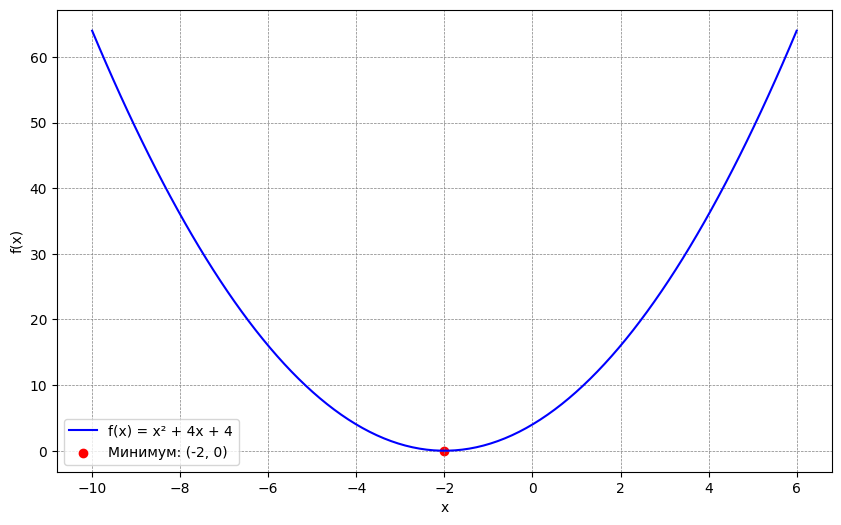

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


x = sp.symbols('x')
f = x**2 + 4*x + 4
res = sp.diff(f, x)

def grad(started, l, nums):
    a = started
    for _ in range(nums):
        gradient = res.evalf(subs={x: a}) 
        a = a - l * gradient  
    return a, f.evalf(subs={x: a})

starting = 0 
learning = 0.1
num = 100  

min_x, min_value = grad(starting, learning, num)

print(f"x = {round(min_x)}")
print(f"f(x) = {round(min_value)}")

x_vals = np.linspace(-10, 6, 100)  
y_vals = [f.evalf(subs={x: val}) for val in x_vals] 

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = x² + 4x + 4', color='blue')
plt.scatter(min_x, min_value, color='red', label=f'Минимум: ({round(min_x)}, {round(min_value)})')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()



## 2️⃣ Оптимизация производства
Фабрика производит два вида товаров: **A** и **B**.  
Прибыль с одного товара A — **$5$**, с одного товара B — **$3$**.  
Ограничения:
- На производство A уходит **2 часа**, на B — **1 час**.
- Всего доступно **100 часов**.

Сколько товаров A и B нужно выпустить, чтобы максимизировать прибыль?  
Решите задачу линейного программирования с помощью **симплекс метода**.
За решение оптимизационными библиотеками 0,5 балла, за частное решение этой задачи 0,5 балла.

---



In [ ]:
from scipy.optimize import linprog

c = [-5, -3]

A = [[2, 1]]
b = [100]

x0_bounds = (0, None)  
x1_bounds = (0, None)  

res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')

print(f"Оптимальное количество товаров A: {res.x[0]:.0f}")
print(f"Оптимальное количество товаров B: {res.x[1]:.0f}")
print(f"Максимальная прибыль: {-res.fun:.2f}")


Оптимальное количество товаров A: 0
Оптимальное количество товаров B: 100
Максимальная прибыль: 300.00


## 3️⃣ Комбинаторная оптимизация (Задача рюкзака)
Дан рюкзак ёмкостью **50 кг** и **n** предметов, каждый из которых имеет **вес** и **ценность**.  
Найти, какие предметы нужно выбрать, чтобы **максимизировать общую ценность**, не превышая ограничения по весу.

**Пример входных данных:**
```python
items = [(10, 60), (20, 100), (30, 120)]  # (вес, ценность)
capacity = 50
```
**Ожидаемый результат:**  
Оптимальный набор предметов и максимальная ценность.

---



In [8]:
def ruck(items, capacity):
    n = len(items)
    
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]
    
    for i in range(1, n + 1):
        weight, value = items[i - 1]
        for w in range(capacity + 1):
            if weight <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weight] + value)
            else:
                dp[i][w] = dp[i - 1][w]

    max_value = dp[n][capacity]
    
    w = capacity
    selected_items = []
    
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]: 
            selected_items.append(items[i - 1])
            w -= items[i - 1][0] 

    selected_items.reverse() 
    return selected_items, max_value

items = [(10, 60), (20, 100), (30, 120)]
capacity = 50
selected_items, max_value = ruck(items, capacity)

print("Выбранные предметы:", selected_items,"\nЦенность:", max_value)



Выбранные предметы: [(20, 100), (30, 120)] 
Ценность: 220



## 4️⃣ Оптимизация пути (задача коммивояжёра)
Дан граф с **n** городами и расстояниями между ними.  
Необходимо найти кратчайший путь, проходящий через все города **ровно один раз** и возвращающийся в начальную точку.

**Пример входных данных:**
```python
graph = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]
```
**Ожидаемый результат:**  
Минимальная длина пути и порядок посещения городов.

---




In [11]:
graph = [[0, 10, 15, 20], 
         [10, 0, 35, 25], 
         [15, 35, 0, 30], 
         [20, 25, 30, 0]]
# генерируем перестановки списка городов
def gen(city):
    if len(city) == 1: return [city]
    per = []
    for i in range(len(city)):
        current = city[i]
        nC = city[:i] + city[i + 1 :]
        for p in gen(nC):
            per.append([current] + p)
    return per

def tsp(dist):
    n = len(dist)
    cities = list(range(n))
    minD = float("inf")
    broute = []
    for perm in gen(cities[1:]):
        route = [cities[0]] + list(perm) + [cities[0]]
        currentD = 0
        for i in range(n):
            currentD += dist[route[i]][route[i + 1]]
        if currentD < minD:
            minD = currentD
            broute = route
    return print(
        f"Минимальная длина пути: {minD}. Порядок посещения городов: {broute}"
    )
tsp(graph)

Минимальная длина пути: 80. Порядок посещения городов: [0, 1, 3, 2, 0]



## 5️⃣ Накопленная добыча из скважины

Предположим, что дебит скважины с течением времени уменьшается по определённому закону. Темп падения дебита задан функцией \( Q(t) \), где \( t \) — время в днях, а \( Q(t) \) — дебит в кубических метрах в день на момент времени \( t \).

Для данной задачи темп падения дебита задается функцией:

$$
Q(t) = Q_0 \cdot e^{-\lambda t}
$$

где:
- \( Q_0 \) — начальный дебит (в кубических метрах в день),
- \( \lambda \) — коэффициент падения дебита (в 1/день),
- \( t \) — время (в днях).

Необходимо найти накопленную добычу за период времени от \( t = 0 \) до \( t = T \), то есть посчитать:

$$
D(T) = \int_0^T Q(t) \, dt
$$

Где \( D(T) \) — это накопленная добыча за период времени от 0 до \( T \).

**Входные данные:**
- \( Q_0 = 100 \) м³/день,
- \( lambda = 0.05 \) 1/день,
- \( T = 365 \) дней.

**Ожидаемый результат:**
Вычислить накопленную добычу \( D(T) \).


### Подсказки:
Для вычисления интеграла можно использовать интегрирование из sympy.

---


In [ ]:
import sympy as sp

q0 = 100  
l = 0.05 
T = 100 

t = sp.symbols("t")
q = q0 * sp.exp(-l * t)

integ = sp.integrate(q, t)
Q_res = sp.integrate(q, (t, 0, T))

print(integ)
print(f"Накопленная добыча нефти за {T} дней: {Q_res} м^3")

-2000.0*exp(-0.05*t)
Накопленная добыча нефти за 100 дней: 1986.52410600183 м^3
